# Machine learning models sensative to outliers
1. Naivye Baysed Classifier ---------------------- Not sensitive to outliers
2. SVM ------------------------------------------- Not sensitive to outliers
3. linear regressinon ---------------------------- Sensitive to outliers
4. Logistic regression --------------------------- Sensitive to outliers
5. Decision Tree regressor or classidier --------- Not sensitive to outliers
6. Ensemble(RF,XGboost,GB) ----------------------- Not sensitive to outliers
7. KNN ------------------------------------------- Not sensitive to outliers
8. Kmean ----------------------------------------- Sensitive to outliers
9. Hierarichal ----------------------------------- Sensitive to outliers
10. PCA ------------------------------------------ Sensitive to outliers
11. Neural Networks(ANN) ------------------------- Sensitive to outliers

- There are different type of data sets structures and unstructured. They may or may not be contain outliers. If there are outliers in the data set then select the ml algorithum according to the situations.
- Otherwise clean the data, handel outliers and then only use sensitive to outlier ML algorithumns.
- ML maths is one of the imp factors understand it properly  and then you get proper idea how to use the ml model in different situations.

In [1]:
import pandas as pd

In [2]:
# loading the titanic data set because it have outliers
df=pd.read_csv("titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].isnull().sum()

np.int64(177)

In [5]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

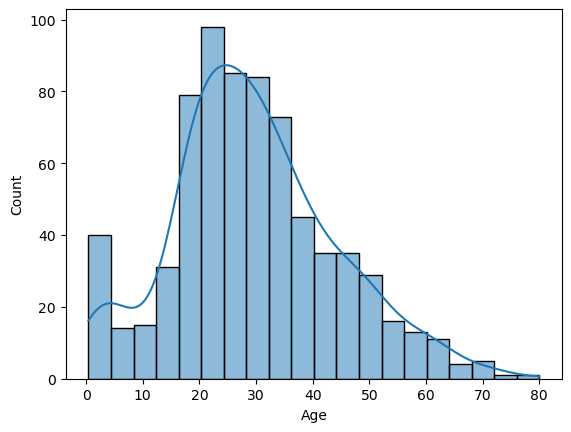

In [6]:
# after droping the null values we get normal distrbution.
sns.histplot(df['Age'].dropna(),kde=True)

<Axes: xlabel='Age', ylabel='Count'>

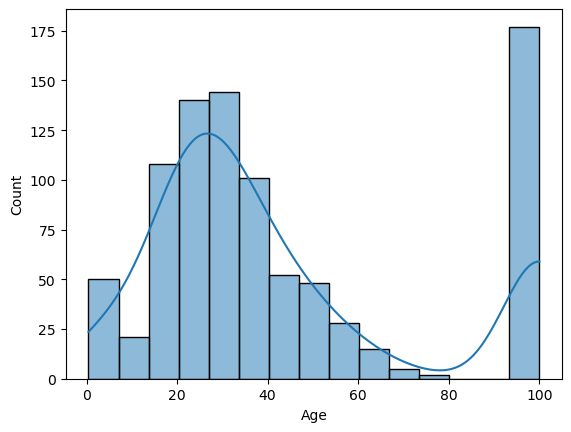

In [7]:
# we are filling the null values with 100 so we get outlier data
sns.histplot(df['Age'].fillna(100),kde=True)

# Handling outliers in Gaussian distribution data

Text(0, 0.5, 'No of passinnger')

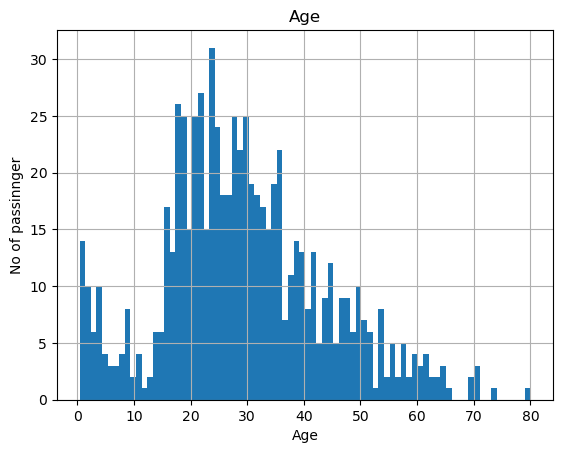

In [8]:
figure=df.Age.hist(bins=80)
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("No of passinnger")

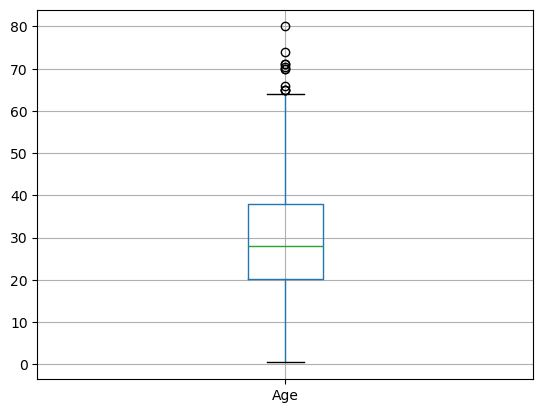

In [9]:
figure=df.boxplot(column='Age')

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
df['Age'].std()

14.526497332334044

In [12]:
df['Age'].mean()

np.float64(29.69911764705882)

In [13]:
# Assuming Age follows a gaussian distribution we will calculate the boundaries which is differentiates the outlietrs
upper_boundary=df['Age'].mean() + 3*df['Age'].std()
lower_boundary=df['Age'].mean() - 3*df['Age'].std()
print(upper_boundary)
print(lower_boundary)

73.27860964406095
-13.88037434994331


# Feature is skiwed.

Text(0, 0.5, 'Count')

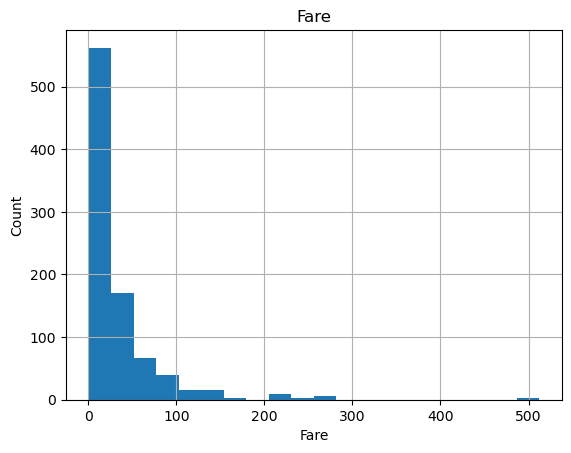

In [14]:
figure=df.Fare.hist(bins=20)
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("Count")

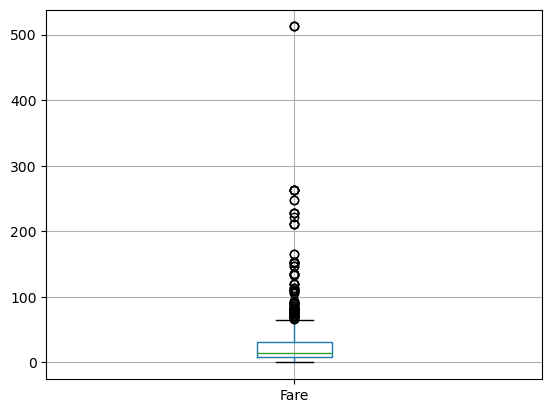

In [15]:
figure=df.boxplot(column='Fare')

In [16]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
# IQR
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
print(IQR)

23.0896


In [18]:
upper_boundary=df['Fare'].mean() + 3*df['Fare'].std()
lower_boundary=df['Fare'].mean() - 3*df['Fare'].std()
print(upper_boundary)
print(lower_boundary)

181.28449376011736
-116.87607782296807


In [19]:
# lower bridge 
# 1.5 depends on the decision of domain expert
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [20]:
# lower bridge 
# 3 is for extrem outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


### solution 
- in case of the skiwed data we can use the extrem outliers.

# Feature engineering outliers handing

### Gaussian diatributed data

In [21]:
import numpy as np
data=df.copy()

In [22]:
data.loc[data['Age']>73,'Age']=73

Text(0, 0.5, 'Count')

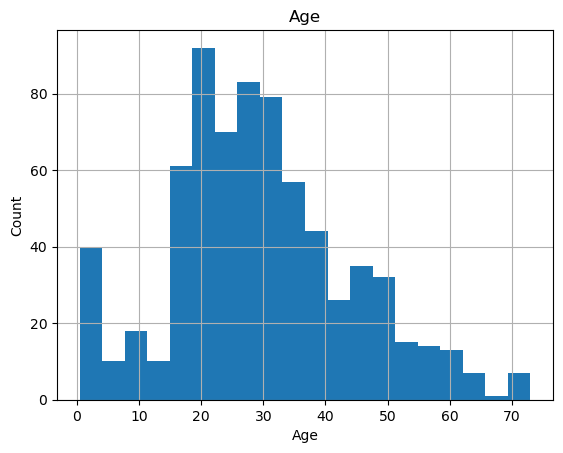

In [23]:
figure=data.Age.hist(bins=20)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Count')

### Skiwed data

In [24]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

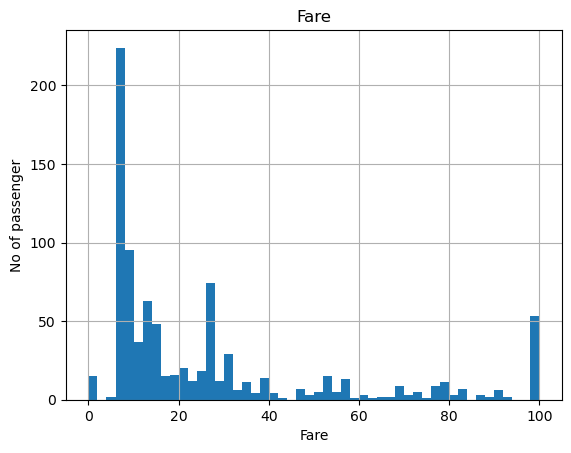

In [25]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

# ML modeling

In [26]:
# train test split for the Age, Fare and Survived form the data copied form the df
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [27]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(Y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(Y_test,y_pred1[:,1])))

Accuracy_score: 0.6455223880597015
roc_auc_score: 0.6634643125036063


In [28]:
# ensenble(RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(Y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(Y_test,y_pred1[:,1])))

Accuracy_score: 0.6492537313432836
roc_auc_score: 0.7115573250245225
